In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

from scipy.linalg import eigh, eig
from numpy import roots

import pandas as pd

# Transformaciones lineales


La revisión de transformaciones lineales debe cubrir

- definición e intuición
- propiedades
- ejemplos de expansión en 1 o 2 dimensiones
- ejemplos de rotación

Una transformación lineal es una función que va a tomar un vector $V$ para mapearlos en otro espacio vectorial $W$. Bajo ciertas condiciones, como tener una dimensión finita y una base bien definida, entonces podemos representar una transformación lineal como una matriz, en nuestro ejemplo será la matriz $A$

$$T(v) = Av$$

donde $$T:\mathcal{V} \rightarrow \mathcal{W}$$

las transformaciones lineales conservan las operaciones de suma vectorial y producto por escalar. Esto es:

- $T(u + v) = T(u) + T(w)$
- $T(\alpha v) = \alpha T(v)$

Llamamos $\operatorname{Ker}(T)$ a todos los vectores $v \in V$ que bajo $T$ van a dar a $0 \in W$

$$
\operatorname{Ker}(T) = \{v \in V: 0 = T(x) \}
$$

Mientras que $\operatorname{Im}(T)$ son todos los vectores $w \in W$ a los que se mapean los vectores $v$

$$
\operatorname{Im}(T) = \{w \in W : w = T(v) \}
$$

## Ejemplos 


Vamos a ver algunos ejemplos de transformaciones lineales como

- Rotación 90°
- Rotación general
- Reflexión
- Expansión y Compresión
- Perspectiva


### Rotación $\pi/2$

Vamos a hacer los siguientes ejemplos de transformaciones lineales, por ejemplo, una rotación con la siguiente matriz

$$
A = \left( \matrix{0 & -1\\
                   1 & 0} \right)
$$

entonces si $v = (x,y)$ ¿qué pasa cuando lo aplicamos?

$$
Ax = \left( \matrix{0 & -1\\
                   1 & 0} \right) \left( \matrix{ x \\ y} \right) =  \left( \matrix{ 0x - 1y \\ 1x + 0y} \right) =  \left( \matrix{-y \\ x} \right)
$$



### Rotación general

De hecho, planteado de forma general, podemos tener una rotación en general para cualquier vector por el ángulo $\theta$ en $\mathcal{R}^2$ con la siguiente matriz

$$
R = \left( \matrix{\cos(\theta) & -\operatorname{sen}(\theta) \\
                   \operatorname{sen}(\theta) & \cos(\theta)} \right)
$$

Es decir si $\theta = \pi/2$ obtenemos a la matriz A

$$
A = \left( \matrix{\cos(\pi/2) & -\operatorname{sen}(\pi/2) \\
                   \operatorname{sen}(\pi/2) &  \cos(\pi/2)} \right) = \left( \matrix{ 0 & -1 \\
                                                                                      1 &  0} \right)
$$

De forma general, cualquier vector $(x,y)$ rotado tiene la siguiente forma

$$
R = \left( \matrix{\cos(\theta) & -\operatorname{sen}(\theta) \\
                   \operatorname{sen}(\theta) & \cos(\theta)} \right) \left( \matrix{ x \\ y} \right) = \left( \matrix{(\cos\theta, -\operatorname{sen} \theta) \cdot (x,y)  \\ (\operatorname{sen} \theta, \cos\theta) \cdot (x,y) } \right) = \left( \matrix { x\cos \theta -y \operatorname {sen} \theta  \\ x\operatorname{sen} + y\cos \theta}\right)
$$

In [3]:
# matriz de rotación con theta = 90°
theta = np.pi/2

A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

vector = np.array([2,4])

# Hacemos la rotación mediante dos métodos, como función
# y como la aplicación de la matriz de rotación
rotacion = lambda th, x, y : np.array([x*np.cos(th) - y*np.sin(th), x*np.sin(th) + y*np.cos(th)])

rotacion(theta, vector[0], vector[1]), A @ vector

(array([-4.,  2.]), array([-4.,  2.]))

### Reflexión


Ahora veamos este otro ejemplo

$$
A = \left( \matrix{1 & 0\\
                   0 & -1} \right)
$$

entonces si $v = (x,y)$ ¿qué pasa cuando lo aplicamos?

$$
Ax = \left( \matrix{1 & 0\\
                    0 & -1} \right) \left( \matrix{ x \\ y} \right) = \left( \matrix{ x \\ -y} \right)
$$


Hacemos algunos puntos que podemos usar de aquí en adelante 

In [164]:
A = np.array([[1,0],[0,-1]])

In [165]:
x_vals_new = np.random.uniform(-0.6, 0.6, 30)
y_vals_new = np.random.uniform(0.5, 0.6, 30)
points_new = np.column_stack((x_vals_new, y_vals_new))

# Apply the reflection matrix
reflected_points_new = points_new @ A

reflected_points_new

array([[-0.46202903, -0.55146539],
       [ 0.59433741, -0.52173451],
       [-0.31832532, -0.56814314],
       [-0.47101249, -0.57607778],
       [ 0.24037822, -0.5316113 ],
       [ 0.18062316, -0.57912637],
       [-0.37947322, -0.5757431 ],
       [-0.29190614, -0.56420324],
       [ 0.41731228, -0.51067737],
       [ 0.30082599, -0.50429206],
       [-0.59502149, -0.56337847],
       [ 0.36313548, -0.53061702],
       [ 0.17096743, -0.52079842],
       [-0.13217288, -0.54977444],
       [ 0.3660831 , -0.55374891],
       [ 0.14014436, -0.51849695],
       [-0.00944796, -0.50104653],
       [-0.44733536, -0.50439313],
       [ 0.55608867, -0.56154107],
       [ 0.08108456, -0.50745688],
       [-0.2644234 , -0.59403258],
       [-0.18135285, -0.50810372],
       [ 0.34217315, -0.53468299],
       [-0.58196843, -0.54379566],
       [ 0.47535493, -0.55657209],
       [ 0.14653578, -0.51912146],
       [-0.20202944, -0.52479902],
       [ 0.43038467, -0.53841265],
       [ 0.3701633 ,

Ahora los graficamos 

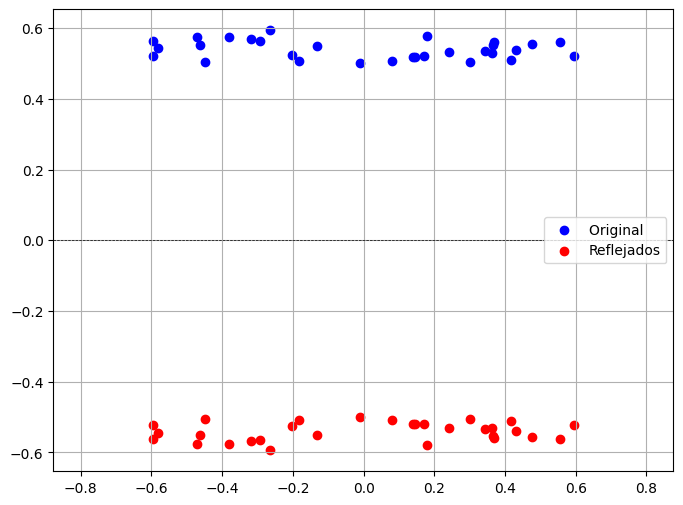

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(points_new[:, 0], points_new[:, 1], color='blue', label='Original ')
plt.scatter(reflected_points_new[:, 0], reflected_points_new[:, 1], color='red', label='Reflejados')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [167]:
def grafica(originales, puntos, etiquetas):
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    ax.scatter(originales[:, 0], originales[:, 1], color='blue', label=etiquetas[0])
    ax.scatter(puntos[:, 0], puntos[:, 1], color='red', label=etiquetas[1])
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
    ax.legend()
    ax.grid(True)
    ax.axis('equal')


In [168]:
#
T = np.array([[2,0],[0,2]])
expandidos = points_new @ T.T

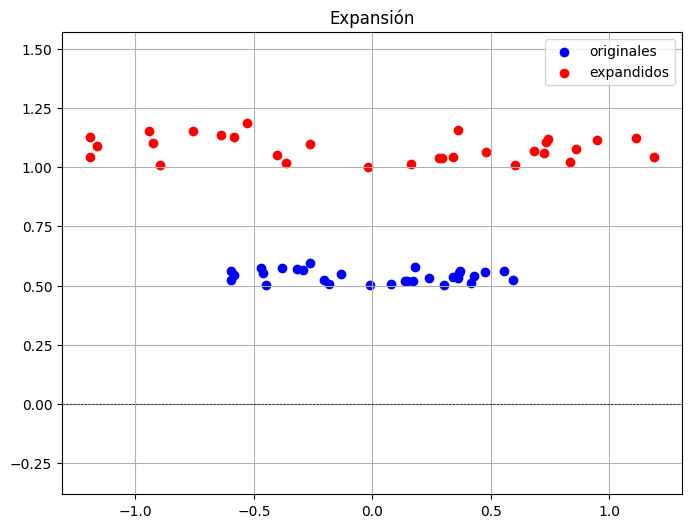

In [169]:
ax = grafica(points_new, expandidos,['originales','expandidos'])

plt.title('Expansión')
plt.show()

### Expansión y contracción

Vamos a aplicar una transformación 
$$
E = mI
$$

Con $m \in \{3, \frac{1}{3}\}$

Con lo que nos quedan estas dos matrices
$$
\begin{align}
E_1 = 3I = \left[ \matrix{3 & 0\\
                          0 & 3} \right] & & E_2 = \frac{1}{3}I = \left[ \matrix{1/3 & 0\\
                                                                                   0 & 1/3} \right]
\end{align}
$$

In [170]:
# Parameters
num_points = 500
r_min = 0.2
r_max = 0.5

# Generate random radii (sqrt distribution for uniform area)
r = np.sqrt(np.random.uniform(r_min**2, r_max**2, num_points))
theta = np.random.uniform(0, 2*np.pi, num_points)

# Convert polar to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Keep only points inside the box [-0.5, 0.5] x [-0.5, 0.5]
mask = (x >= -0.5) & (x <= 0.5) & (y >= -0.5) & (y <= 0.5)
x_boxed = x[mask]
y_boxed = y[mask]


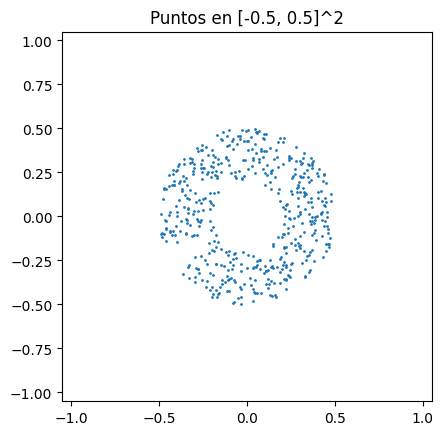

In [10]:
M = np.array([[3,0],[0,3]])
P = np.column_stack((x_boxed, y_boxed))
plt.scatter(P[:,0], P[:,1], s=1)
plt.xlim(-1.05, 1.05)
plt.ylim(-1.05, 1.05)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Puntos en [-0.5, 0.5]^2')
plt.show()

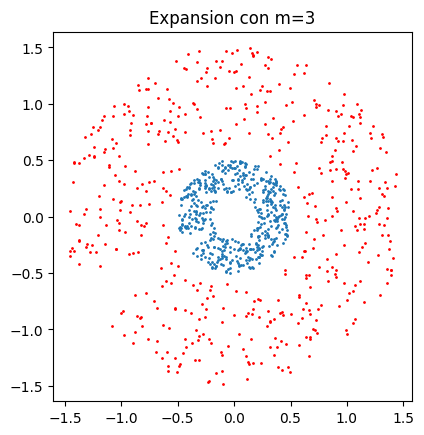

In [11]:
expansion = P @ M
plt.scatter(expansion[:,0], expansion[:,1], s=1, c='r')
plt.scatter(P[:,0], P[:,1], s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Expansion con m=3')
plt.show()


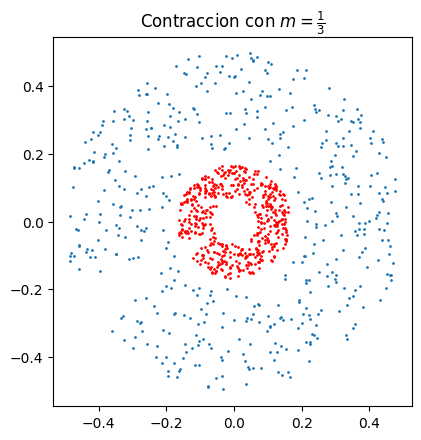

In [12]:
N = np.array([[1/3,0],[0,1/3]])
contraccion = P @ N
plt.scatter(contraccion[:,0], contraccion[:,1], s=1, c='r')
plt.scatter(P[:,0], P[:,1], s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'Contraccion con $m=\frac{1}{3}$')
plt.show()

### Perspectiva

Vamos a intentar la transofrmación lineal siguiente
$$
A = \left( \matrix{m & 0\\
                   0 & 1/m} \right)
$$

para dos valores
$$
m = \lbrace 2, \frac{1}{2} \rbrace
$$

In [13]:
m = 1/2
T = np.array([[m, 0],[0, 1/m]])
nuevos = points_new @ T.T
T

array([[0.5, 0. ],
       [0. , 2. ]])

Text(0.5, 1.0, '$m =0.5$')

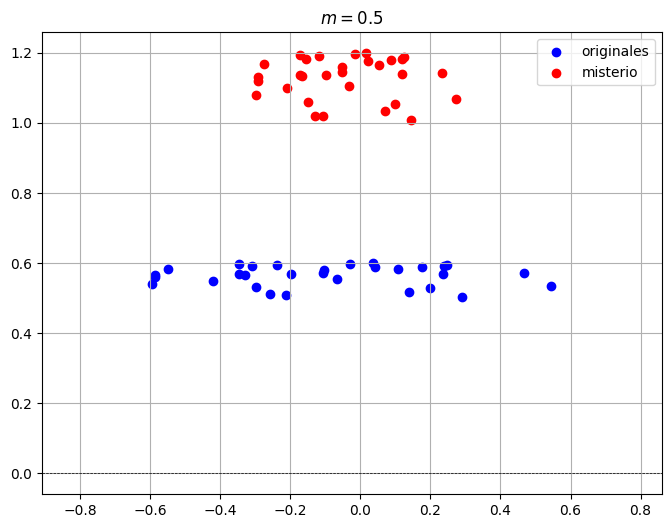

In [14]:

ax = grafica(points_new, nuevos, ['originales','misterio'])
plt.title(rf'$m ={m}$')

### Inclinación

Vamos a intentar la transofrmación lineal siguiente
$$
S = \left( \matrix{1 & -\sin\theta\\
                   0 & \cos\theta} \right)
$$

que inclina los puntos sobre el eje $Y$ en un ángulo $\theta$. Si $\theta=\pi/6$ entonces la matriz $S$ queda como

$$
S =  \left( \matrix{1 & -\sin\pi/6\\
                   0 & \cos\pi/6} \right) = \left( \matrix{1 & -0.5\\
                                                           0 &  \sqrt{3}/2} \right)
$$


In [15]:
S =  np.array([[1, -np.sin(np.pi/6)],[0, np.cos(np.pi/6)]])
S

array([[ 1.       , -0.5      ],
       [ 0.       ,  0.8660254]])

In [16]:
N = (S @ expansion.T).T


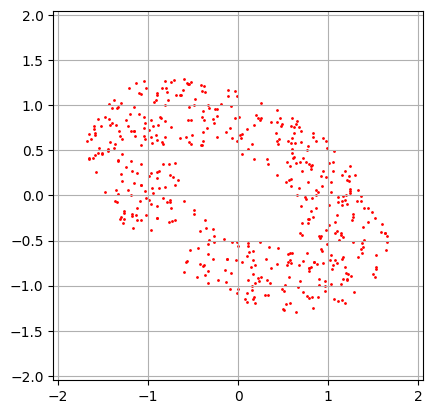

In [17]:
# plt.scatter(expansion[:,0], expansion[:,1], s=1)
plt.scatter(N[:,0], N[:,1], s=1, c='r')
plt.xlim(-2.05, 2.05)
plt.ylim(-2.05, 2.05)
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')


## Animación


C:\Users\usuario\AppData\Local\Temp\ipykernel_21788\718083623.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


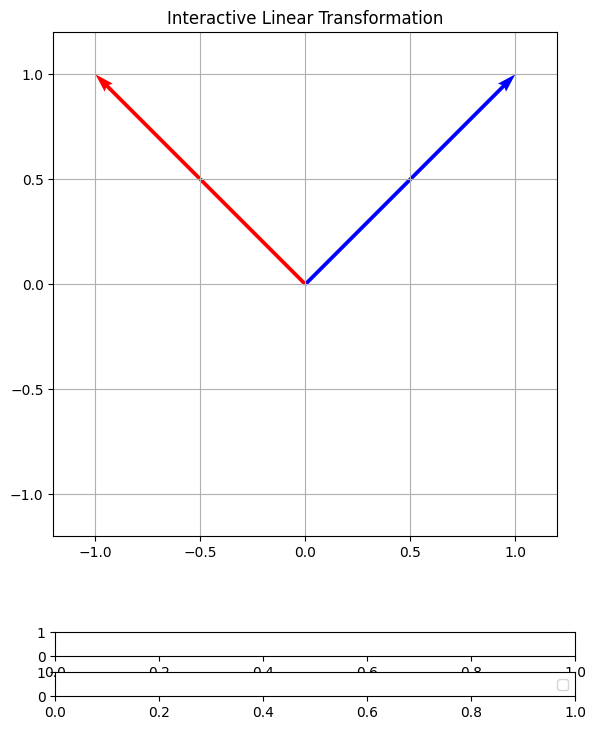

In [18]:
# Define the transformation matrix
A = np.array([[0, -1],
              [1, 0]])

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(bottom=0.25)  # Leave space for sliders
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.grid(True)
ax.set_aspect('equal')
ax.set_title('Interactive Linear Transformation')

# Initial vector
x_init, y_init = 1, 1
vector = np.array([x_init, y_init])
transformed_vector = A @ vector

# Plot the original and transformed vectors
orig_arrow = ax.quiver(0, 0, x_init, y_init, angles='xy', scale_units='xy', scale=1, color='blue', label='Original')
trans_arrow = ax.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Transformed')

# Sliders for x and y components
ax_x = plt.axes([0.2, 0.1, 0.65, 0.03])
ax_y = plt.axes([0.2, 0.05, 0.65, 0.03])

#slider_x = Slider(ax_x, 'X', -4.0, 4.0, valinit=x_init)
#slider_y = Slider(ax_y, 'Y', -4.0, 4.0, valinit=y_init)

# Update function
def update(val):
    x = slider_x.val
    y = slider_y.val
    vector = np.array([x, y])
    transformed = A @ vector

    # Update the arrows
    orig_arrow.set_UVC(x, y)
    trans_arrow.set_UVC(transformed[0], transformed[1])
    fig.canvas.draw_idle()

# # Connect sliders to update function
# slider_x.on_changed(update)
# slider_y.on_changed(update)

plt.legend()
plt.show()


Original vector: [ 1.  -0.5]
Transformed vector: [0.5 1. ]


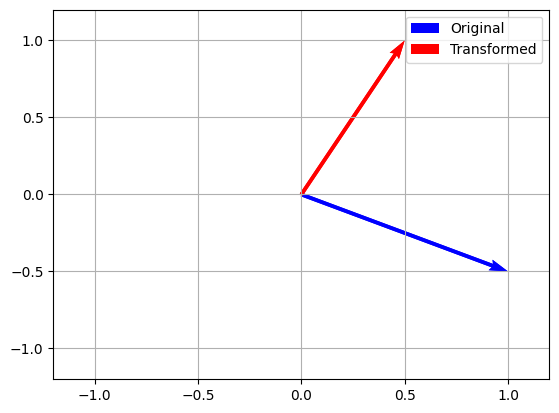

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define a vector and a matrix
v = np.array([1,-0.5])  # our original vector
A = np.array([[0,-1],
              [1,0]])  # matrix that stretches x by 2 and y by 3

# Apply the linear transformation
v_transformed = A @ v  # matrix multiplication
# v_transformed = V @ A.T

print("Original vector:", v)
print("Transformed vector:", v_transformed)

# Plotting
origin = np.array([[0, 0], [0, 0]])  # origin point
vectors = np.array([v, v_transformed]).T
# vectors = zip(v, v_transformed)

plt.quiver(*origin.T, *v, color='blue', angles='xy', scale_units='xy', scale=1, label='Original')
plt.quiver(*origin.T, *v_transformed.T, color='red', angles='xy', scale_units='xy', scale=1, label='Transformed')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid()
# plt.title('Linear Transformation of a Vector')
plt.legend(['Original', 'Transformed'])
plt.show()


## Eigenespacio

¿Cómo analizamos una transformación lineal? Vamos a centrar nuestro interés en aquellos que son múltiplos escalares entre ellos 

$$
v = \lambda w
$$

Con esta igualdad estamos buscando un escalar $\lambda$ que hace a los vectores $v$ y $w$ colineales. Por ejemplo $\left[\matrix{1\\0.5\\3}\right] = 0.25 \cdot \left[\matrix{4\\2\\12}\right]$ con $\lambda = \frac{1}{4}$
.

Ahora, si consideramos a toda la transformación lineal $A$ y proyectamos al vector $v$
$$
Av = w
$$
donde $\left[\matrix{ w_1 \\ \vdots \\ w_n} \right] = \left[\matrix{ a_{11}v_1 + \ldots + a_{1m}v_n \\ \vdots \\ a_{n1}v_1 + \ldots + a_{nm}v_n } \right]$ es decir $w_i = \sum_{j=1}^{n} a_{ij}v_j$. 

Cuando pasa que
$$
Av = \lambda v
$$
Decimos que $v$ es un **eigenvector** de $A$ y la ecuación se puede expresar como todos aquellos vectores que no están rotando y sólo se multiplican escalarmente.

Entonces lo que nos resta es determinar la forma de todos estos vectores $v$. Podemos plantear la ecuación equivalente como sigue

$$
\begin{align}
 Av - \lambda v & \equiv (A - \lambda I)v = 0 \\
\end{align}
$$

La respuesta no trivial a esta ecuación se cumple cuando $\det(A-\lambda I) = 0$. Es decir debemos resolver la siguiente expresión.

$$
\det \left( \left[\matrix{a_{11} - \lambda & a_{21}            & \ldots & a_{1m}          \\ 
                          a_{21}           & a_{22} - \lambda  & \ldots & a_{2m}          \\
                                \vdots     &     \ddots        & \vdots                   \\
                          a_{n1}           & a_{22}            & \ldots & a_{nm} - \lambda } \right] \right) = 0
$$

Recordando el determinante (en $\mathcal{R}^2$) se calcula como $\det(A) = ad - bc$. Entonces una transformación lineal en $\mathcal{R}^2$ esta expresión queda como

$$
\det \left( \left[\matrix{a_{11} - \lambda & a_{12} \\ 
                  a_{21}                   & a_{22} - \lambda } \right] \right) = 0
$$

Aplicando la definición de $\det$ esto se reduce a resolver el siguiente polinomio
$$
p(\lambda) = (a_{11}-\lambda)(a_{22}-\lambda) - a_{21}a_{12} = 0
$$

A $p(\lambda)$ lo denominamos **polinomio característico** y a las raíces $\lambda_i$ los denominamos **eigenvalores** que son los escalares que 
escalan cada entrada de los eigenvectores. Es importante notar que las transformaciones lineales a las que les podemos sacar los eigenvectores deben ser de $n\times n$, es decir sólo está definido para matrices cuadradas.

En la práctica usamos algoritmos computacionales como la factorización $QR$ para determinar los eigenvectores ya que es imposible resolver este polinimio cuando es de grado $n\ge 5$

Con cada una de las raíces de $p(\lambda)$ hay que obtener cada uno de los eigenvectores $v_i$ asociados a cada a partir de la igualdas
$$
(A - \lambda_i I)v_i = 0
$$

Ejemplo. Si $A$ es la matriz
$$
A = \left[\matrix{1 & 3\\0 & 2}\right]
$$
entonces
$$
p(\lambda) = (1-\lambda)(2 -\lambda) = 0
$$
Resolviendo este polinomio se puede constatar que
$$
\lambda = \lbrace 1, 2 \rbrace
$$
Y para obtener los eigenvectores hay que resolver la siguiente ecuación para $\lbrace \lambda_1, \lambda_2 \rbrace$
$$
(A - \lambda_i I)v_i = \left[\matrix{1 - \lambda_i & 3\\0 & 2 - \lambda_i}\right] \left( \matrix{v_{i,1} \\ v_{i,2}} \right) = 0
$$
para $\lambda_1=1$ tenemos que $A-I = \left[\matrix{0 & 3\\0 & 1}\right]$ y para $\lambda_2=2$ lo que tenemos es $A-2I =
\left[\matrix{-1 & 3\\0 & 0}\right]$ los eigenvectores son
$$
\begin{array}[cc]
& v_1 = \left(\matrix{1\\0}\right) & v_2 = \left(\matrix{3\\1}\right)
\end{array}
$$


In [171]:
A = np.array([[1,3],[0, 2]])
A

array([[1, 3],
       [0, 2]])

In [23]:
eig(A)

(array([1.+0.j, 2.+0.j]),
 array([[1.        , 0.9486833 ],
        [0.        , 0.31622777]]))

In [24]:
#A - l I = 0
coefs = [1, -3, 2]
lambdas = np.roots(coefs)
lambdas


array([2., 1.])

In [25]:
B = A - lambdas[0] * np.eye(2)
B

array([[-1.,  3.],
       [ 0.,  0.]])

In [26]:
m = 4
T = np.array([[m, 0], [0, 1/m]])
T

array([[4.  , 0.  ],
       [0.  , 0.25]])

In [27]:
eigh(T)

(array([0.25, 4.  ]),
 array([[ 0., -1.],
        [-1., -0.]]))

## Sistemas discretos

Un sistema dinámico discreto describe la evolución de un sistema a pasos discretos a través de un mapeo. Este función puede ser representada a través de una transformación lineal.

$$
x_{t+1} = Ax_t
$$

Típicamente de un proceso de este tipo es determinar el comportamiento a largo plazo de un sistema gobernado así, y cuando el sistema está descrito por una transformación lineal 

$$\begin{align}
x_1 & = Ax_0 \\
x_2 & = Ax_1 \\
& \vdots \\
x_n & = Ax_{n-1}
\end{align}
$$

La iteración repetida de la aplicación de $A$ se ve como sigue

$$\begin{align}
x_2 & = A(A x_0)     & = A^2x_0 \\
x_3 & = A(A(A(x_0))) & = A^3x_0\\
 & \vdots \\
x_n & = A(A(\ldots(Ax_0)))\ldots) = A^n x_0
\end{align}
$$

### Ejemplo 1: El clima como ejemplo

Un caso sencillo en el que sólo hay dos estados del clima, Soleado y Nublado.
La probabilidad de pasar de 

|    | S  |  N |
|:--:|----|----|
|**S**   | 0.8| 0.3|
|**N**   | 0.2| 0.7|


In [28]:
C = np.array([[0.8, 0.3], [0.2, 0.7]])
p0 = np.array([1,0])
p1 = C@p0
p2 = C@p1
p3 = C@p2
p4 = C@p3
p4
l, V = eig(C)
tt = V[:,0].sum()
V[:,0] / tt

array([0.6, 0.4])

A continuación vamos a hacer un pequeño ejemplo hipotético en el que midamos cómo se puede modelar el clima usando un sistema dinámico discreto, en particular uno denominado Modelo Oculto de Markok (HMM)

En nuestro sistema simplificado vamos a considerar tres estados:

- Soleado (S)
- Lluvioso (R)
- Nublado (O)

Las primeras 212 lecturas del clima con esta convención son las siguientes 
> SSSSSSSSSSSSSSSORRSSOOORSSSSORSORRRSOORRRSOOROOOROORRRSSSOORSSOSSOOORRROSSOROROSSSRROOROSSSSSSSSSSORRSSOOR
> RSOORRSSSORROSSSSSRRRSSORSSORSSSORSSSSSSSSSOOORRROSSSSOORRSSSSSOSSSSORORORRRSSSORORSSSSSOSSSOSSSRRRSORSRSS

In [129]:
sequence  = "SSSSSSSSSSSSSSSORRSSOOORSSSSORSORRRSOORRRSOOROOOROORRRSSSOORSSOSSOOORRROSSOROROSSSRROOROSSSSSSSSSSORRSSOOR"
sequence += "RSOORRSSSORROSSSSSRRRSSORSSORSSSORSSSSSSSSSOOORRROSSSSOORRSSSSSOSSSSORORORRRSSSORORSSSSSOSSSOSSSRRRSORSRSS"
len(sequence)

212

¿Cuál es la probabilidad de cada estado?

In [130]:
Total = len(sequence)
pR = sequence.count('R') / Total
pO = sequence.count('O') / Total
pS = sequence.count('S') / Total
print(f'Las probabilidades de cada estado son \nSoloeado {pS:.3f} \nLluvioso {pR:.3f} \nNublado {pO:.3f}')

Las probabilidades de cada estado son 
Soloeado 0.491 
Lluvioso 0.259 
Nublado 0.250


Como nuestra motivación es entender la sucesión de un estado de clima al otro entonces vamos a medir las siguientes probabilidades

- $P(X_t =R| X_{t-1}=R)$ Que son todas las veces que llovió considerando que el día anterior había llovido

In [173]:
# De todas las transiciones con antecesor R 
# P(# |sequence
todas_las_transiciones = [y for y in [sequence[i:i+2] for i in range(0,len(sequence))] if y[0]=='R']
transiciones_al_edo    = [y for y in [sequence[i:i+2] for i in range(0,len(sequence))] if y=='RR']
len(todas_las_transiciones), len(transiciones_al_edo)

(55, 23)

In [132]:
# vamos a hacerlo una función para cualquier transicion
def calcula_transiciones(tupla, lista=sequence, verbose=True):
    org, dst = tupla
    todas_las_transiciones = [y for y in [lista[i:i+2] for i in range(0,len(lista)-1)] if y[0]==org]
    transiciones_al_edo    = [y for y in todas_las_transiciones if y[1]==dst]
    if(verbose):
        print(f'{len(transiciones_al_edo)} / {len(todas_las_transiciones)}')
    return len(transiciones_al_edo) / len(todas_las_transiciones)

calcula_transiciones(('R','R'))


23 / 55


0.41818181818181815

In [133]:
# ahora vamos a hacerlo para todas las combinaciones
# de estados 
# usando un diccionario
transiciones = {}
for origen in 'RSO':
    for destino in 'RSO':
        trans_o_d = calcula_transiciones((origen, destino))
        print(f'La transicion de {origen} a {destino} fue de {trans_o_d:.3f}')
        transiciones[(origen, destino)] = trans_o_d

23 / 55
La transicion de R a R fue de 0.418
20 / 55
La transicion de R a S fue de 0.364
12 / 55
La transicion de R a O fue de 0.218
4 / 103
La transicion de S a R fue de 0.039
74 / 103
La transicion de S a S fue de 0.718
25 / 103
La transicion de S a O fue de 0.243
28 / 53
La transicion de O a R fue de 0.528
9 / 53
La transicion de O a S fue de 0.170
16 / 53
La transicion de O a O fue de 0.302


In [134]:
df = pd.DataFrame.from_dict(transiciones, orient='index', columns=['value'])
df.index = pd.MultiIndex.from_tuples(df.index)

matriz_transicion = df['value'].unstack(fill_value=0)

print(matriz_transicion)

          O         R         S
O  0.301887  0.528302  0.169811
R  0.218182  0.418182  0.363636
S  0.242718  0.038835  0.718447



| $X_{t-1}$ $X_t$| O      |    R     |   S     |
:---------------:|:------:|:--------:|:-------:|
| **O**          | 30.2%  | 52.8%    | 17.0%   |
| **R**          | 21.8%  | 41.8%    | 36.4%   |
| **S**          | 24.3%  |  3.9%    | 71.8%   | 


Esta función dice que si hoy es

`Nublado (O)` entonces para mañana hay una posibilidad del `30.2%` de que siga Nublado `O`, `52.8%`de que Llueva `R` y un `17%` este Soleado `S`. Y así para los demás estados.

Es importante notar que la suma de cada renglón nos debe dar 1

In [135]:
matriz_transicion.sum(axis=1)

O    1.0
R    1.0
S    1.0
dtype: float64

In [140]:
# Tomemos una distribución inicial
p0 = np.array([0, 1, 0])
assert sum(p0)==1

# Entonces con estas probabilidades, mañana tenemos la probabilidad para cada estado como sigue
p1 =   p0 @ P; p1, sum(p1)

(array([0.21818182, 0.41818182, 0.36363636]), 1.0)

In [141]:
# y al día siguiente
p2 = p1 @ P; p2, sum(p2)

(array([0.24536713, 0.3042637 , 0.45036917]), 0.9999999999999999)

In [144]:
# o bien
p2 = p0 @ (P @ P) ; p2, sum(p2)

(array([0.24536713, 0.3042637 , 0.45036917]), 1.0)

In [146]:
# ahora vamos a ver cómo sería el comportamiento en el largo
# plazo haciendo estas operaciones durante "muchas" iteraciones
# en cuanto haya convergido a un valor estable, nos detendemos
#
#  P p* = p*
#
p = np.array([0,1,0])
# p = np.array([1/3, 1/3, 1/3])
T = 300
for i in range(T):
    pant = p.copy()
    p = pant @ P 
    if(np.allclose(p,pant, atol=1e-10)):
        break

print(f'En la iteracion {i} se obtuvo una distribución final (O,R,S) \n{p}')

En la iteracion 11 se obtuvo una distribución final (O,R,S) 
[0.25118477 0.26066423 0.488151  ]


In [149]:
p0 = np.array([1,0,0])
p15 = p0 @ np.linalg.matrix_power(P,10) 
p15, sum(p15)

(array([0.25118279, 0.26068661, 0.48813061]), 1.0)

El estado estable que induce esta distribución lo vamos a obtener usando los eigenvectores de $P$. Es importante notar que estamos buscando el eigenvector izquierdo ($\pi P = \pi$) pero las bibliotecas numéricas típicamente sacan el eigenvector derecho ($Pv=\lambda v$) y en una matriz no simétrica esto sí afecta. Para lograr esto vamos a obtenerlo a partir de la matriz transpuesta y nos vamos a fijar en el eigenvector con $\lambda = 1$.

$$
\pi P = \pi  \Leftrightarrow P^T \pi^T = \pi^T
$$

In [150]:
vals,vects = np.linalg.eig(P.T)

In [151]:
vals

array([0.10255841, 0.33595681, 1.        ])

El eigenvector asociado al eigenvalor $|\lambda|=1$ es el último. Este vector es el que caracteriza el comportamiento del sistema a la larga y es a partir del cuál podemos ver la probabilidad final de cada estado.

In [152]:
vects

array([[ 0.46040578,  0.06537991,  0.41331897],
       [-0.81417197, -0.73752618,  0.42891591],
       [ 0.35376619,  0.67214626,  0.80324253]])

In [44]:
# vamos a quedarnos con el eigenvector más cercano a 1
# en este caso es el primero 
#
estado_estable = vects[:, np.isclose(vals, 1)].flatten()
estado_estable /= estado_estable.sum()
estado_estable.sum(), estado_estable

(1.0, array([0.25118483, 0.26066351, 0.48815166]))


Entonces para la condición inicial $p_0$ obtenemos una probabilidad de cada uno de los 
posibles estados como lo indica el vector asociado al eigenvalor = 1. Es decir, los posibles estados
de nublado, lluvioso y soleado respectivamente, tienen una probabilidad de:

$$
\pi = [0.251, 0.260, 0.488]
$$

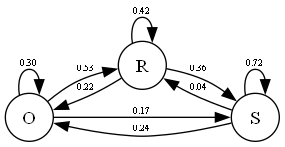

In [45]:
import pydot
from IPython.display import Image

# Create a directed graph
graph = pydot.Dot(graph_type='digraph', rankdir='LR')  # 'digraph' = directed graph

# Add nodes (states)
num_states = P.shape[0]
etiquetas_nodos = 'ORS'
for i in range(num_states):
    node = pydot.Node(f"{etiquetas_nodos[i]}", shape="circle",) 
    graph.add_node(node)

# Add edges (transitions) with weights
for i in range(num_states):
    for j in range(num_states):
        weight = P[i,j]
        if weight > 0:  # Only draw edges with non-zero probability
            edge = pydot.Edge(
                f"{etiquetas_nodos[i]}", f"{etiquetas_nodos[j]}", 
                label=f"{weight:.2f}",  # Rounded to 2 decimal places
                fontsize="7"
            )
            graph.add_edge(edge)

# Save the graph to a file (PNG format)
# graph.write_png("transition_graph.png")

# Alternatively, display in Jupyter Notebook
# 
Image(graph.create_png())

### Ejemplo 2

$$\begin{align}
F &= \left[\begin{matrix} 1 & 1 \\ 1 & 0 \end{matrix}\right]
\end{align}$$

Con este estado inicial
$$\begin{align}
p &= \left[\begin{matrix} 1 \\ 0 \end{matrix}\right]
\end{align}$$

El eigenespacio de $F$ se obtiene de
$$\begin{align}
\det(F - \lambda I) &= \det\left(\left[\begin{matrix} 1 -\lambda & 1 \\ 1 & -\lambda \end{matrix}\right]\right) = 0
\end{align}$$

Con el que obtenemos un polinomio $p(\lambda)$
$$
p(\lambda) = \lambda^2 - \lambda - 1 = 0 \implies  \lambda_{1,2} = \frac {1 \pm \sqrt{5}} {2}
$$

La evolución de algunos estados son estos
$$
\begin{align}
\left[\begin{matrix}1 \\ 1\end{matrix}\right]&= F \left[\begin{matrix}1 \\ 0\end{matrix}\right] \\
\left[\begin{matrix}2 \\ 1\end{matrix}\right]&= F \left[\begin{matrix}1 \\ 1\end{matrix}\right] \\
\left[\begin{matrix}3 \\ 2\end{matrix}\right]&= F \left[\begin{matrix}2 \\ 1\end{matrix}\right] \\
\vdots & \\
\left[\begin{matrix}21 \\ 13\end{matrix}\right]&= F \left[\begin{matrix}13 \\ 8\end{matrix}\right] \\
\end{align}
$$

In [84]:
### Ejemplo 2
F = np.array([[1,1],[1,0]])
F

array([[1, 1],
       [1, 0]])

In [85]:
p = np.array([1,0])  # estado inicial

for i in range(10):
    pant = p.copy()
    print(f"{i} {pant}")
    p = F.dot(p)

print(p)

0 [1 0]
1 [1 1]
2 [2 1]
3 [3 2]
4 [5 3]
5 [8 5]
6 [13  8]
7 [21 13]
8 [34 21]
9 [55 34]
[89 55]


In [86]:

p = np.array([1,0])  # estado inicial
O = [p]
for i in range(50):
    p = F.dot(p)
    O.append(p)
    

In [87]:
list(enumerate(O))

[(0, array([1, 0])),
 (1, array([1, 1])),
 (2, array([2, 1])),
 (3, array([3, 2])),
 (4, array([5, 3])),
 (5, array([8, 5])),
 (6, array([13,  8])),
 (7, array([21, 13])),
 (8, array([34, 21])),
 (9, array([55, 34])),
 (10, array([89, 55])),
 (11, array([144,  89])),
 (12, array([233, 144])),
 (13, array([377, 233])),
 (14, array([610, 377])),
 (15, array([987, 610])),
 (16, array([1597,  987])),
 (17, array([2584, 1597])),
 (18, array([4181, 2584])),
 (19, array([6765, 4181])),
 (20, array([10946,  6765])),
 (21, array([17711, 10946])),
 (22, array([28657, 17711])),
 (23, array([46368, 28657])),
 (24, array([75025, 46368])),
 (25, array([121393,  75025])),
 (26, array([196418, 121393])),
 (27, array([317811, 196418])),
 (28, array([514229, 317811])),
 (29, array([832040, 514229])),
 (30, array([1346269,  832040])),
 (31, array([2178309, 1346269])),
 (32, array([3524578, 2178309])),
 (33, array([5702887, 3524578])),
 (34, array([9227465, 5702887])),
 (35, array([14930352,  9227465])),


In [88]:
ps = np.array([1836311903, 1134903170])
sum(ps)

C:\Users\usuario\AppData\Local\Temp\ipykernel_21788\3112824445.py:2: RuntimeWarning: overflow encountered in scalar add
  sum(ps)


-1323752223

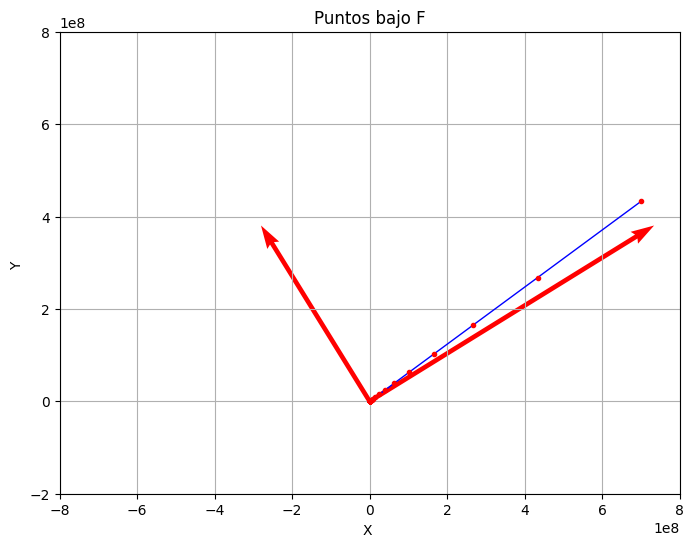

In [172]:
O_array = np.array(O)

# Extract x and y coordinates
x = O_array[:44, 0]
y = O_array[:44, 1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=1)  # 'b-' means blue line
plt.plot(x, y, 'ro', markersize=3)  # 'ro' means red dots

# Add labels and title
plt.xlabel('X ')
plt.ylabel('Y ')
plt.title('Puntos bajo F')

plt.quiver(0,0, *vectsf[:,0]*valsf[0], color='red', scale=3)
plt.quiver(0,0, *vectsf[:,1], color='red', scale=3)
plt.xlim(-8e8, 8e8)
plt.ylim(-2e8, 8e8)

# Show the plot
plt.grid(True)
plt.show()

In [92]:
valsf, vectsf = np.linalg.eig(F.T)

In [93]:
vectsf

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [94]:
valsf

array([ 1.61803399, -0.61803399])

$$
\phi = \frac{1 + \sqrt{5}}{2}
$$

In [196]:
phi_1, phi_2 = (1+np.sqrt(5))/2, (1-np.sqrt(5))/2
phi_1, phi_2

(1.618033988749895, -0.6180339887498949)